
# Rúbrica simulacion de proyecto, Modelo Analítico  

- Realizar slides (maximo 3) en froma de reporte 

- Los datos se le debe apliocar su análisis y procedimientos con el mayor detalle y cuidado en la explicación para facilitar su lectura, interpretación y discusión


Objetivos
La calificación máxima será de 10 tomando en cuenta lo siguiente


* 1. Documento no mayor a 3 hojas/slides con las ideas más importantes del desarrollo del modelo y conclusiones

* 2. Desarrollo del modelo

2.1 El desarrollo del modelo primordialmente será sobre los datos(Regresión Logística)

2.2 Se deben utilizar una técnica de modelación de Regresión Logística, Árboles de Decisión, Support Vector Machine, Gradient Boosting, o Redes Neuronales

2.3 Se debe incluir un apartado de interpretación de resultados y una recomendación de como se debe utilizar el modelo

2.4 El uso de apoyos gráficos deberá ser utilizando un formato diferente al arrojado por default de Python

* 3. La defensa del proyecto  se hará al final en un markd 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/oscar/Downloads/application_data.csv")
df = df.drop_duplicates()  # podemos hacer esto solo por que no hay fechas, si no seria antes un analisis si ingluye que un id pueda estar el mismo dia 
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
def analizar_valores_vacios(data):
    # Calcular el porcentaje de valores vacíos para cada columna
    porcentajes_vacios = data.isnull().mean() * 100
    
    # Filtrar las columnas que tienen más del 30% de valores vacíos
    columnas_mayor_30 = porcentajes_vacios[porcentajes_vacios > 34]
    
    # Verificar y mostrar los resultados
    if not columnas_mayor_30.empty:
        print("Columnas con más del 34% de valores vacíos:")
        for columna, porcentaje in columnas_mayor_30.items():
            print(f"{columna}: {porcentaje:.2f}%")
    else:
        if porcentajes_vacios.any():
            print("Hay valores vacíos pero no pasan del 34% en ninguna columna")
        else:
            print("No hay valores vacíos en el DataFrame")

In [4]:
analizar_valores_vacios(df)

Columnas con más del 34% de valores vacíos:
OWN_CAR_AGE: 65.99%
EXT_SOURCE_1: 56.38%
APARTMENTS_AVG: 50.75%
BASEMENTAREA_AVG: 58.52%
YEARS_BEGINEXPLUATATION_AVG: 48.78%
YEARS_BUILD_AVG: 66.50%
COMMONAREA_AVG: 69.87%
ELEVATORS_AVG: 53.30%
ENTRANCES_AVG: 50.35%
FLOORSMAX_AVG: 49.76%
FLOORSMIN_AVG: 67.85%
LANDAREA_AVG: 59.38%
LIVINGAPARTMENTS_AVG: 68.35%
LIVINGAREA_AVG: 50.19%
NONLIVINGAPARTMENTS_AVG: 69.43%
NONLIVINGAREA_AVG: 55.18%
APARTMENTS_MODE: 50.75%
BASEMENTAREA_MODE: 58.52%
YEARS_BEGINEXPLUATATION_MODE: 48.78%
YEARS_BUILD_MODE: 66.50%
COMMONAREA_MODE: 69.87%
ELEVATORS_MODE: 53.30%
ENTRANCES_MODE: 50.35%
FLOORSMAX_MODE: 49.76%
FLOORSMIN_MODE: 67.85%
LANDAREA_MODE: 59.38%
LIVINGAPARTMENTS_MODE: 68.35%
LIVINGAREA_MODE: 50.19%
NONLIVINGAPARTMENTS_MODE: 69.43%
NONLIVINGAREA_MODE: 55.18%
APARTMENTS_MEDI: 50.75%
BASEMENTAREA_MEDI: 58.52%
YEARS_BEGINEXPLUATATION_MEDI: 48.78%
YEARS_BUILD_MEDI: 66.50%
COMMONAREA_MEDI: 69.87%
ELEVATORS_MEDI: 53.30%
ENTRANCES_MEDI: 50.35%
FLOORSMAX_MEDI: 49.

In [5]:
# borrando columnas con mas del 34% de valores vacios
df = df.dropna(thresh=len(df)*0.66, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Que variables nos servirian y cuales no

In [6]:
# Convertiremos estos negativos en positivos
df.loc[:, 'DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])                             # Edad del cliente en días al momento de la solicitud, ¿por qué deberían ser negativos?
df.loc[:, 'DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])                   # ¿Cuántos días antes de la solicitud el cliente cambió el documento de identidad con el que solicitó el préstamo?
df.loc[:, 'DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])     # ¿Cuántos días antes de la solicitud el cliente cambió de teléfono?
df.loc[:,'DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df.loc[:,'DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

In [7]:
df_0= df[df['TARGET']==0]
df_1= df[df['TARGET']==1]
len(df_0),len(df_1)

(282686, 24825)

C:\Users\oscar\AppData\Local\Temp\ipykernel_23444\3567732713.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


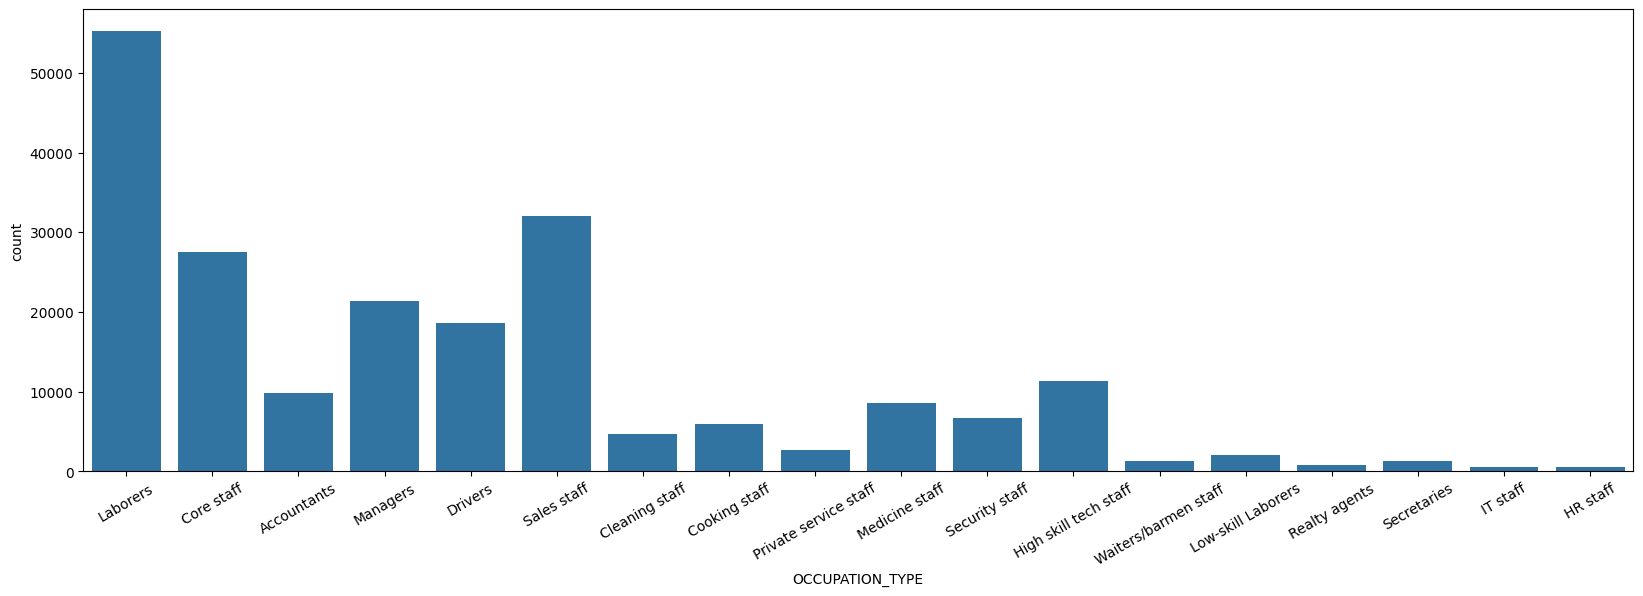

In [8]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df, x='OCCUPATION_TYPE')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

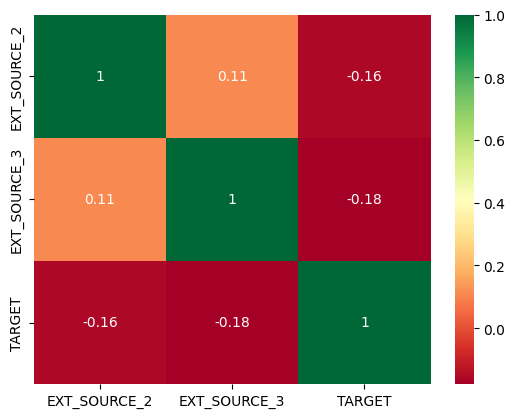

In [9]:
Source = df[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

C:\Users\oscar\AppData\Local\Temp\ipykernel_23444\3280099439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Erizo",0:"Pagador"})


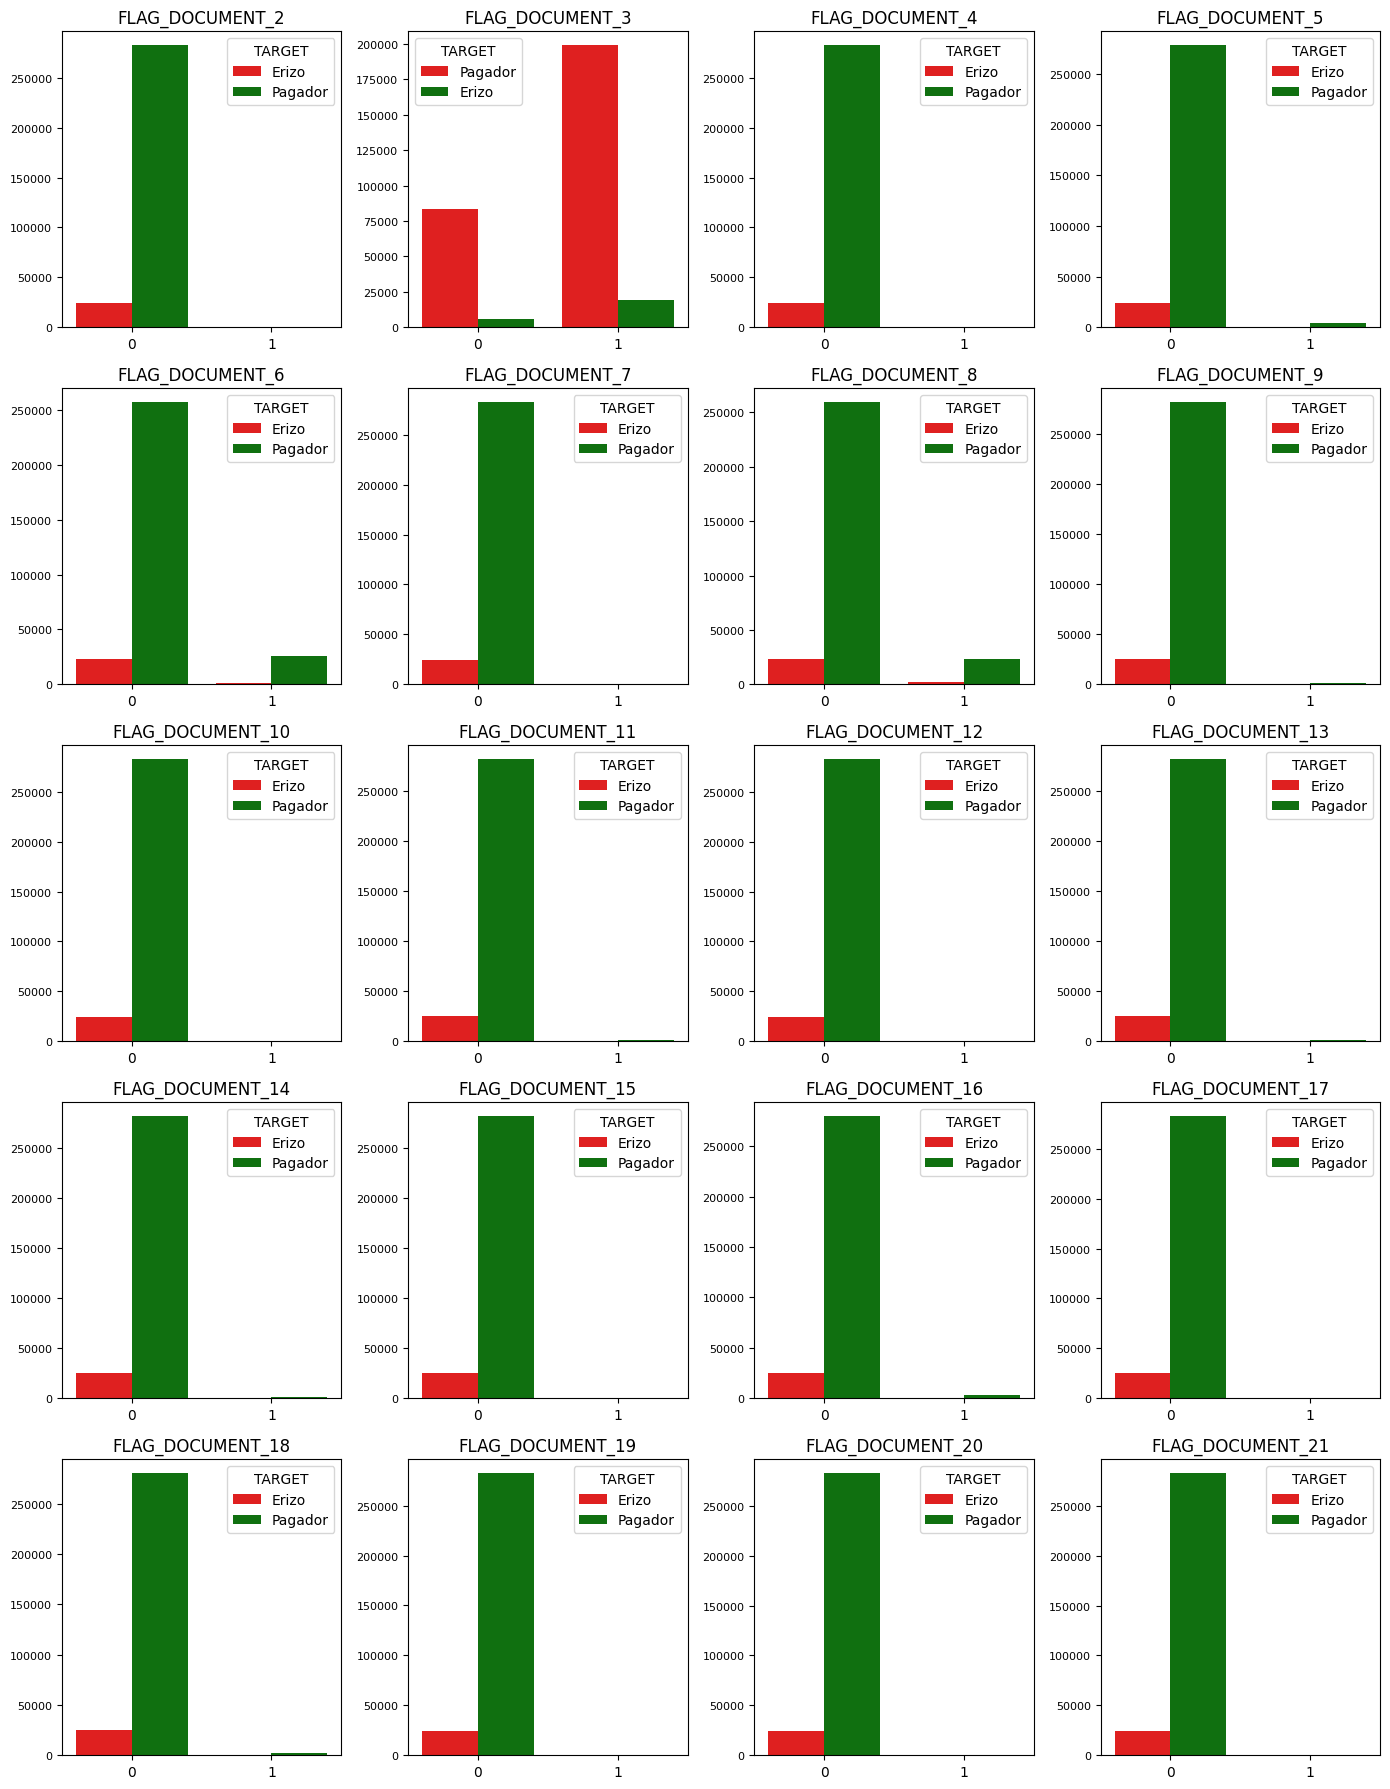

In [10]:
# Comprobar la relevancia de Flag_Document y si tiene alguna relación con el estado de pago del préstamo
Flags_documents = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

# Filtrar el DataFrame con las columnas seleccionadas
df_flag = df[Flags_documents + ["TARGET"]]

# Crear la figura
fig = plt.figure(figsize=(14, 18))

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Erizo",0:"Pagador"})
# Bucle for para iterar sobre las columnas y sus índices
for j, i in enumerate(Flags_documents):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

# Mostrar la figura
plt.tight_layout()
plt.show()

El gráfico anterior muestra que en la mayoría de los casos de solicitud de préstamo, los clientes que solicitaron préstamos no enviaron FLAG_DOCUMENT_X excepto FLAG_DOCUMENT_3, es decir tenemos datos relevantes tanto 1 y 0 (recordando 1 probelmas de pago y 0 o.c). Por lo tanto, podemos quedarnos FLAG_DOCUMENT_3, poir lo cual deberia eliminar el resto de las columnas. Los datos muestran que si el prestatario ha enviado FLAG_DOCUMENT_3, hay menos posibilidades de incumplir el préstamo

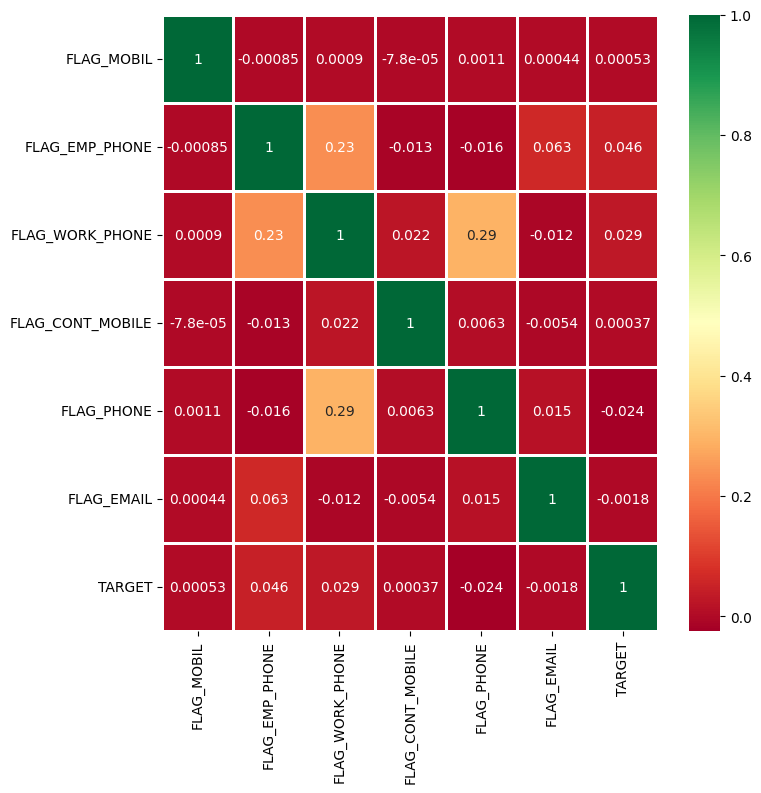

In [11]:
# Comprobando si existe alguna correlación entre el teléfono móvil, el teléfono del trabajo, etc., el correo electrónico, los miembros de la familia y la calificación de la región
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

No existe correlación entre las banderas de teléfono móvil, correo electrónico, etc. con el pago del préstamo; por lo tanto estas columnas se pueden eliminar

In [12]:
colums_to_delete = [ 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
           'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL']

In [13]:
df = df.drop(colums_to_delete, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


# Estandarización de datos

In [15]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'] / 365.25
df['YEARS_BIRTH'] = df['YEARS_BIRTH'].round().astype(int)
print(df[['DAYS_BIRTH', 'YEARS_BIRTH']].head())

   DAYS_BIRTH  YEARS_BIRTH
0        9461           26
1       16765           46
2       19046           52
3       19005           52
4       19932           55


<Axes: xlabel='YEARS_BIRTH'>

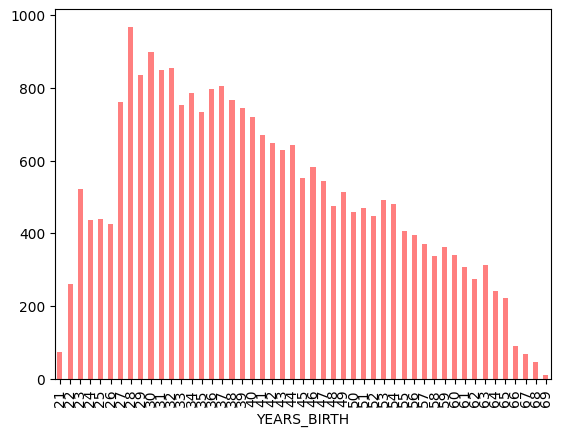

In [16]:
df.loc[df['TARGET'] == 1, 'YEARS_BIRTH'].value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5, label='Target = 1')

In [17]:
# A veces esto no es lo mejor y seria separar las columnas numericas de las categoricas a mano para no cometer un error por el tipo pero ya se verico antes y para este caso funcionaria 
def separar_columnas(df, excluidas_num=None, excluidas_cat=None):
    if excluidas_num is None:
        excluidas_num = []
    if excluidas_cat is None:
        excluidas_cat = []

    # Obtener todas las columnas numéricas, excluyendo las especificadas
    columnas_numericas = [col for col in df.select_dtypes(include=np.number).columns if col not in excluidas_num]
    
    # Obtener todas las columnas categóricas (de tipo objeto), excluyendo las especificadas
    columnas_categoricas = [col for col in df.select_dtypes(include='object').columns if col not in excluidas_cat]
    
    return columnas_numericas, columnas_categoricas

columnas_numericas, columnas_categoricas = separar_columnas(df)

In [18]:
df_categorico = df[columnas_categoricas]

C:\Users\oscar\AppData\Local\Temp\ipykernel_23444\2837923706.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


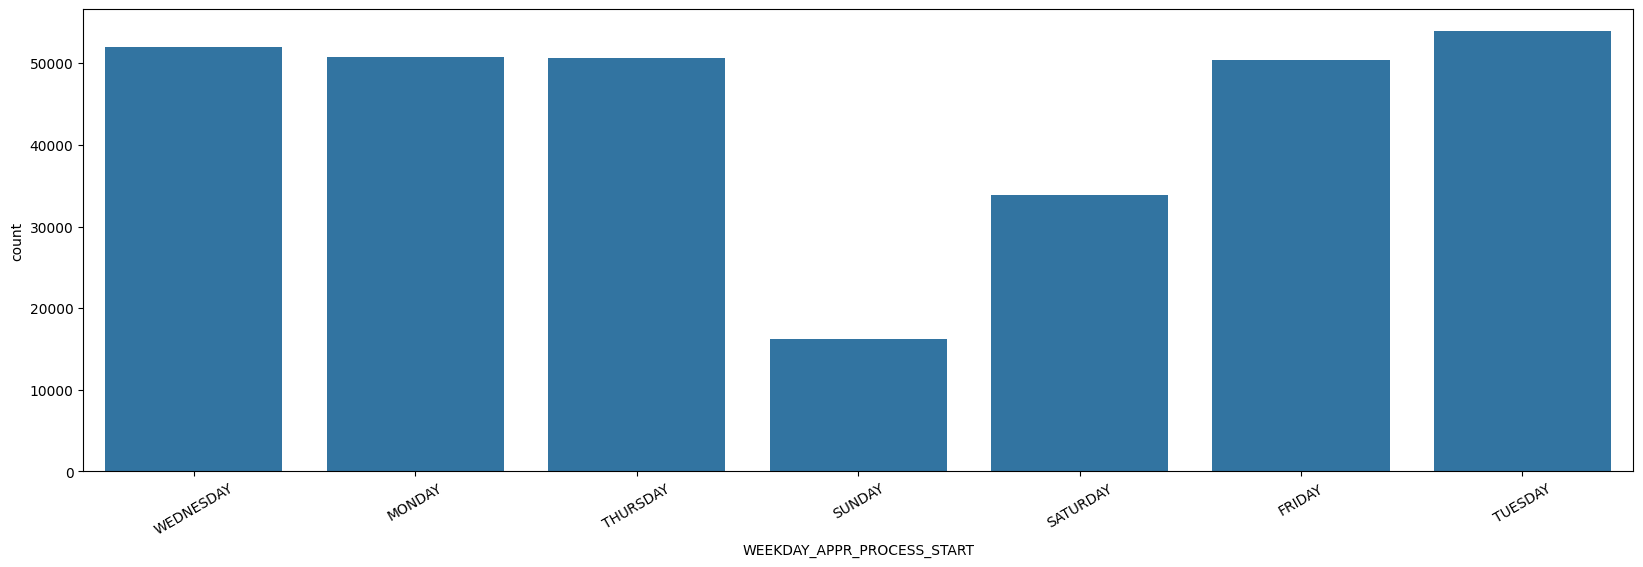

In [19]:
# grafico de barras
plt.figure(figsize=(20,6))
ax = sns.countplot(data=df_categorico, x='WEEKDAY_APPR_PROCESS_START')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.show()

In [28]:
missing_values = df_categorico.isnull().sum()
columns_missing = missing_values[missing_values  > 0]
columns_missing

Series([], dtype: int64)

In [22]:
df_categorico['NAME_TYPE_SUITE'] = df_categorico['NAME_TYPE_SUITE'].fillna(df_categorico['NAME_TYPE_SUITE'].mode()[0])

C:\Users\oscar\AppData\Local\Temp\ipykernel_23444\1126595037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorico['NAME_TYPE_SUITE'] = df_categorico['NAME_TYPE_SUITE'].fillna(df_categorico['NAME_TYPE_SUITE'].mode()[0])


In [27]:
df_categorico.iloc[df_categorico[df_categorico['OCCUPATION_TYPE'].isna()].index, df_categorico.columns.get_loc('OCCUPATION_TYPE')] = 'Unknown'


In [30]:
df_numeric = df[columnas_numericas]

In [60]:
missing_val_numeric = df_numeric.isnull().sum()
columns_missing_numeric = missing_val_numeric[missing_val_numeric > 0]
columns_missing_numeric

EXT_SOURCE_2                  660
EXT_SOURCE_3                60965
OBS_30_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_60_CNT_SOCIAL_CIRCLE     1021
dtype: int64

In [55]:
# No valores dummy  1 y 0 
df_numeric.loc[:, 'DAYS_LAST_PHONE_CHANGE'] = df_numeric['DAYS_LAST_PHONE_CHANGE'].fillna(0.0)
df_numeric.loc[:, 'AMT_ANNUITY'] = df_numeric['AMT_ANNUITY'].fillna(0.0)
df_numeric.loc[:, 'AMT_GOODS_PRICE'] = df_numeric['AMT_GOODS_PRICE'].fillna(0.0)
df_numeric.loc[:, 'CNT_FAM_MEMBERS'] = df_numeric['CNT_FAM_MEMBERS'].fillna(0.0)

# cuantas veces se consulto buro antes de solcitar credito por hora, dia, semana, mes etc
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_HOUR'] = df_numeric['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0.0)
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_DAY'] = df_numeric['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0.)
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_WEEK'] = df_numeric['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0.)
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_MON'] = df_numeric['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0.)
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_QRT'] = df_numeric['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0.)
df_numeric.loc[:, 'AMT_REQ_CREDIT_BUREAU_YEAR'] = df_numeric['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0.)

In [62]:
df_numeric

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,26
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,0.0,828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,46
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,0.0,617.0,1,0.0,0.0,0.0,0.0,0.0,0.0,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,...,0.0,273.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,365243,...,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,57
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,...,0.0,1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,...,0.0,322.0,1,0.0,0.0,0.0,0.0,0.0,0.0,33


In [65]:
df_categorico

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Unknown,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1
